## Hovmoller Sites TCI

This notebook opens a shape file of transects, allows you to select a transect by number (or plot all sites), and plot a hovmoller diagram of the site tasselled cap indices based on datacube landsat surface reflectance data and BoM rainfall data.

Dependencies:

  * shapefile of the site transects in EPSG 4326
  
The following sensors are available for the following time frames:
* Landsat 5 - 1986 to April 1999  followed by a gap until May 2003 - November 2011 (data from 2009 onwards becomes less reliable in southern Australia)
* Landsat 7 - April 1999 to present, however after May 2003 the scan line corrector (SLC) failed, 
so data are referred to as SLC-off, meaning they've got a venetian blinds appearance with wedges of missing data
  * This data is not well suited for inclusion in composites, but is fine to use in time series analysis
* Landsat 8 - April 2013 onwards
  
Bex Dunn June 2018

### Set up modules, functions and libraries

In [2]:
#in this notebook we want to plot non-interactively
%matplotlib inline

#suppress warnings thrown when rainfall data is imported
# import logging
# logging.getLogger('rasterio._gdal').setLevel(logging.ERROR)
# import warnings

#get standard libraries
import datetime as dt
import fiona
import geopandas as gpd
import shapely.geometry
from shapely.geometry import shape
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib.dates
import numpy as np
import os
import pickle
import rasterio
import rasterio.features
import sys
import xarray as xr

#modules for datacube
import datacube
from datacube.utils import geometry
from datacube.storage.storage import write_dataset_to_netcdf
from datacube.helpers import write_geotiff

# Import external functions from dea-notebooks
sys.path.append(os.path.expanduser('~/dea-notebooks/Scripts/'))
import DEAPlotting, DEADataHandling
from BandIndices import tasseled_cap
import TasseledCapTools
from FileDialogs import *

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

#alias for datacube
dc = datacube.Datacube(app='dc-BoMrainfallandNbart')

### Set up functions for this notebook

In [3]:
#This defines the function that converts a linear vector file into a string of x,y coordinates
def geom_query(geom, geom_crs='EPSG:4326'):
    """
    Create datacube query snippet for geometry
    """
    return {
        'x': (geom.bounds[0], geom.bounds[2]),
        'y': (geom.bounds[1], geom.bounds[3]),
        'crs': geom_crs
    }

def warp_geometry(geom, crs_crs, dst_crs):
    """
    warp geometry from crs_crs to dst_crs
    """
    return shapely.geometry.shape(rasterio.warp.transform_geom(crs_crs, dst_crs, shapely.geometry.mapping(geom)))


def transect(data, geom, resolution, method='nearest', tolerance=None):
    """
    gets the transect
    """
    #Changed for py3 compatibility 17.03.17
    dist = [i for i in range(0, int(geom.length), resolution)]
    #points = zip(*[geom.interpolate(d).coords[0] for d in dist]) py2
    points = list(zip(*[geom.interpolate(d).coords[0] for d in dist])) #py3
    indexers = {
        data.crs.dimensions[0]: list(points[1]),
        data.crs.dimensions[1]: list(points[0])        
    }
    return data.sel_points(xr.DataArray(dist, name='distance', dims=['distance']),
                           method=method,
                           tolerance=tolerance,
                           **indexers)
def load_rainfall(query):
    
    dc_rf =datacube.Datacube(config='/g/data/r78/bom_grids/rainfall.conf')
    
    rf_data = dc_rf.load(product = 'rainfall_grids_1901_2017',**query)

    return rf_data

## add the path to the input shapefile

In [4]:
#transects file will be the file containing our transects
transects_file = '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_shapefiles/transects/merged2_hovmoller_transects2.shp'
transects_df = gpd.read_file(transects_file)

## Define the epoch

In [5]:
#Define temporal range
start_of_epoch = '1987-10-01' 
end_of_epoch =  '2017-10-01'
print ('temporal range is '+start_of_epoch+' to '+end_of_epoch)

temporal range is 1987-10-01 to 2017-10-01


### Retrieve data, plot hovmollers and save to file (this may take some time)

BasaltR_AmeliaDowns
BasaltR_AmeliaDowns_ix0
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_AmeliaDowns_ix0_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_AmeliaDowns_ix0_/hov_data_BasaltR_AmeliaDowns_ix0_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


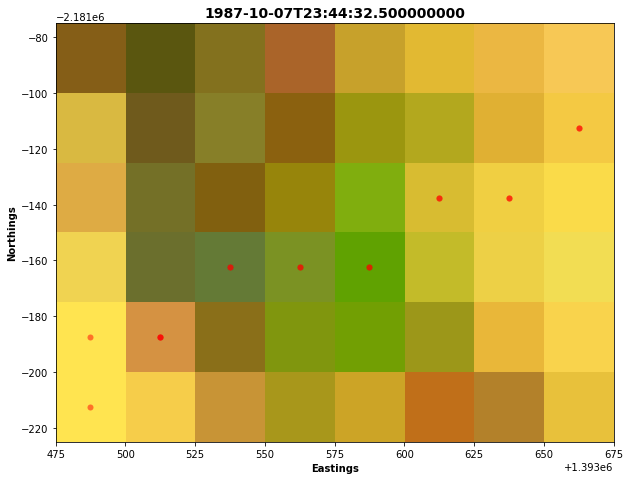

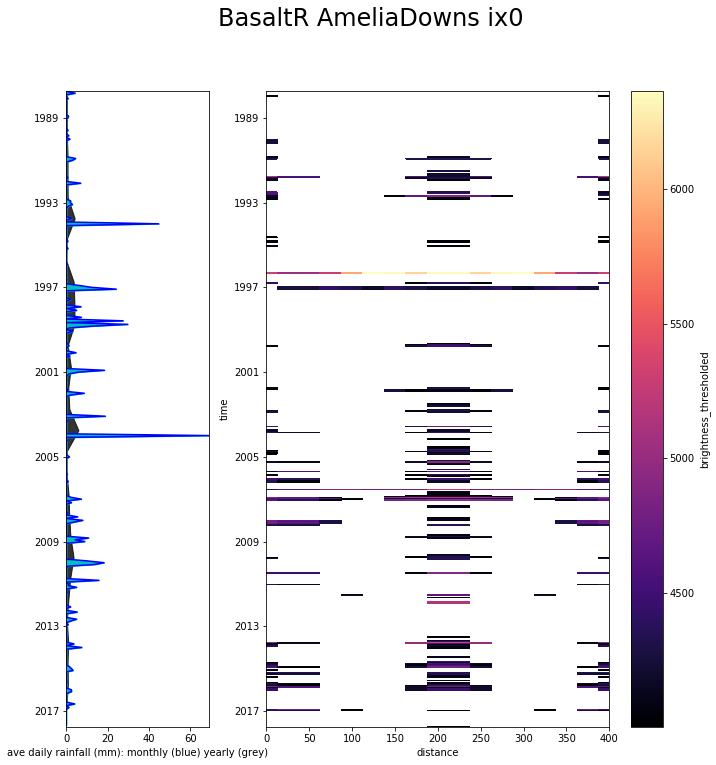

saved data to file
Basalt R Bluff Downs
Basalt_R_Bluff_Downs_ix1
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Basalt_R_Bluff_Downs_ix1_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Basalt_R_Bluff_Downs_ix1_/hov_data_Basalt_R_Bluff_Downs_ix1_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


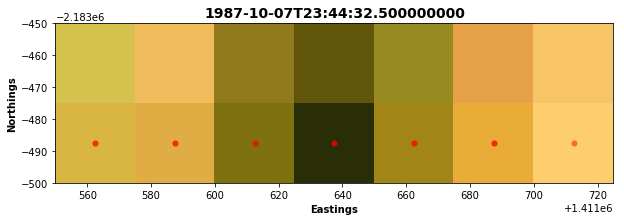

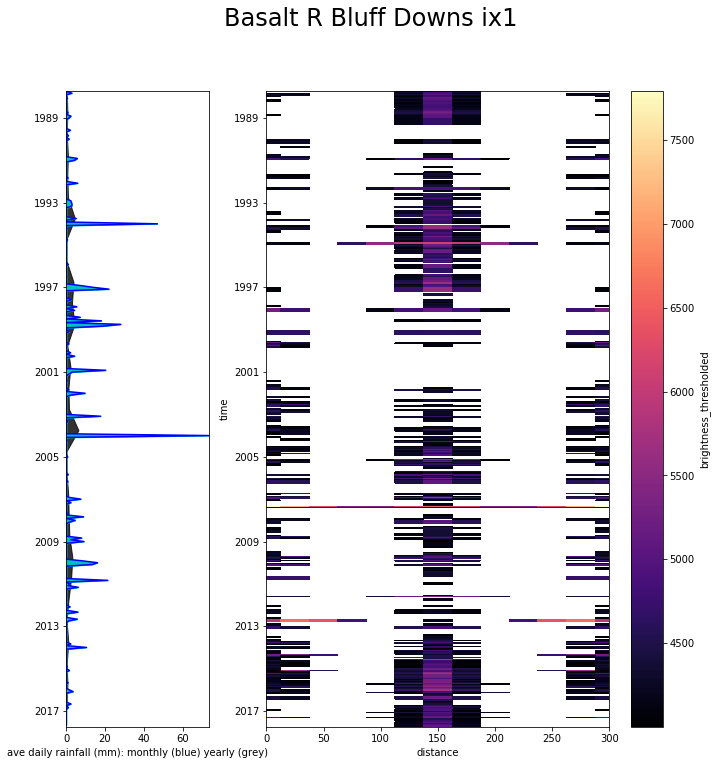

saved data to file
BasaltR_Cargoon
BasaltR_Cargoon_ix2
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Cargoon_ix2_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Cargoon_ix2_/hov_data_BasaltR_Cargoon_ix2_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


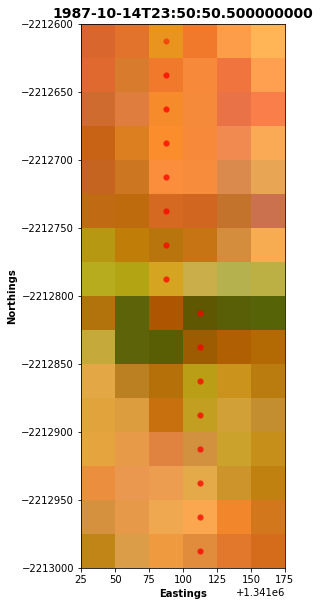

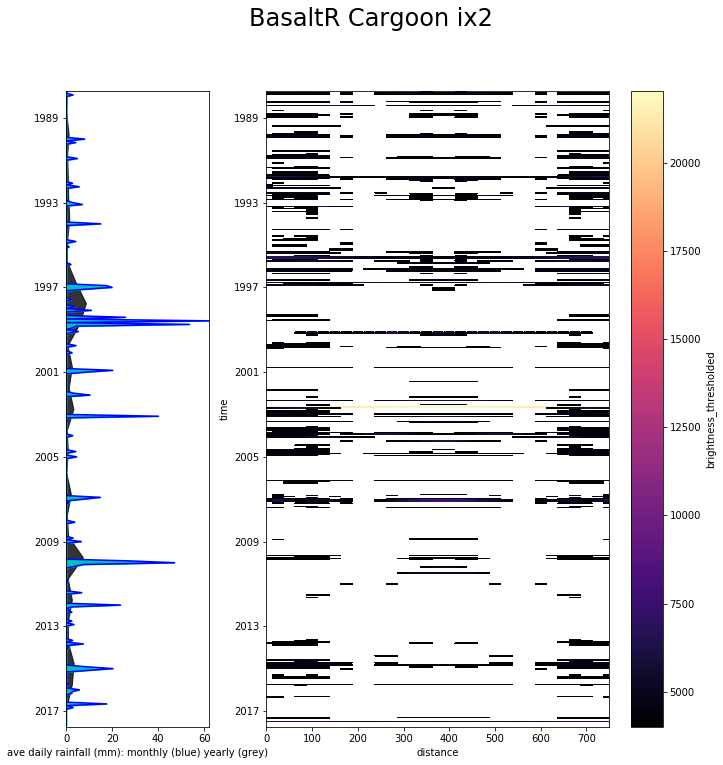

saved data to file
BasaltR_Ellenvale
BasaltR_Ellenvale_ix3
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Ellenvale_ix3_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Ellenvale_ix3_/hov_data_BasaltR_Ellenvale_ix3_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


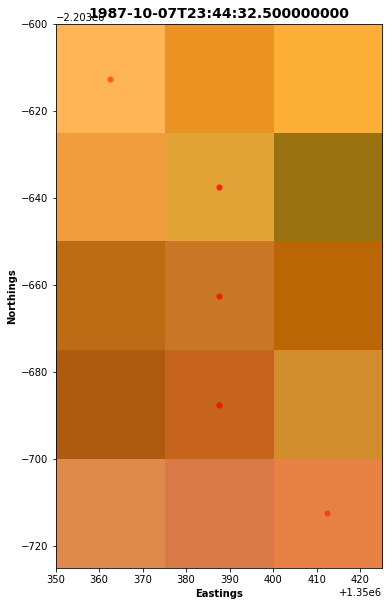

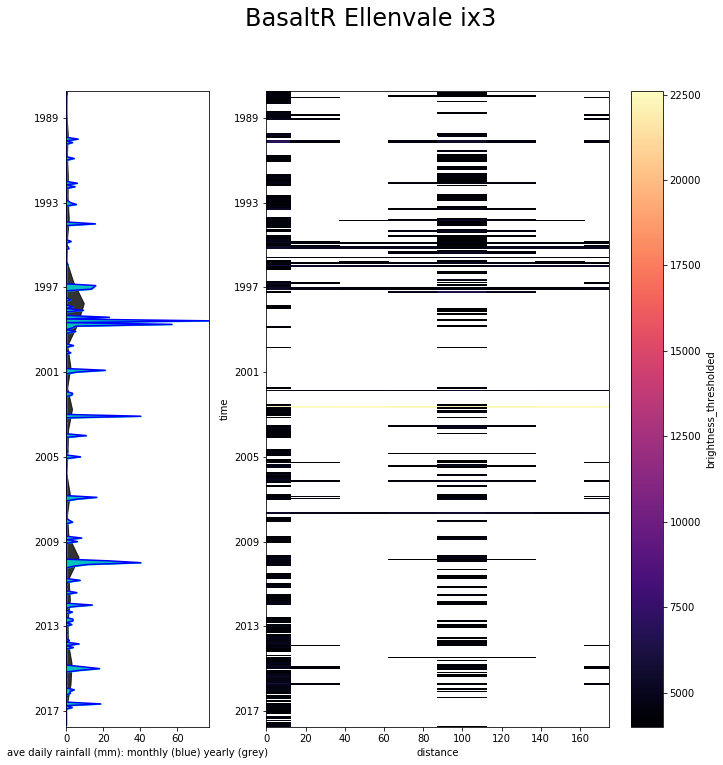

saved data to file
BasaltR_JackoCk
BasaltR_JackoCk_ix4
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_JackoCk_ix4_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_JackoCk_ix4_/hov_data_BasaltR_JackoCk_ix4_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


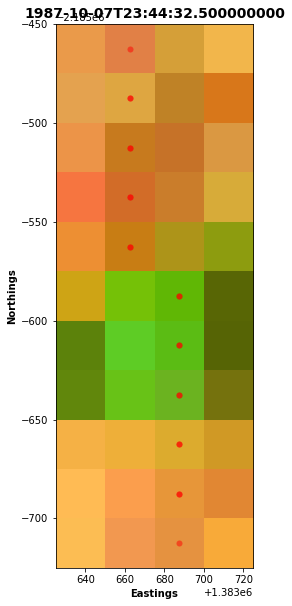

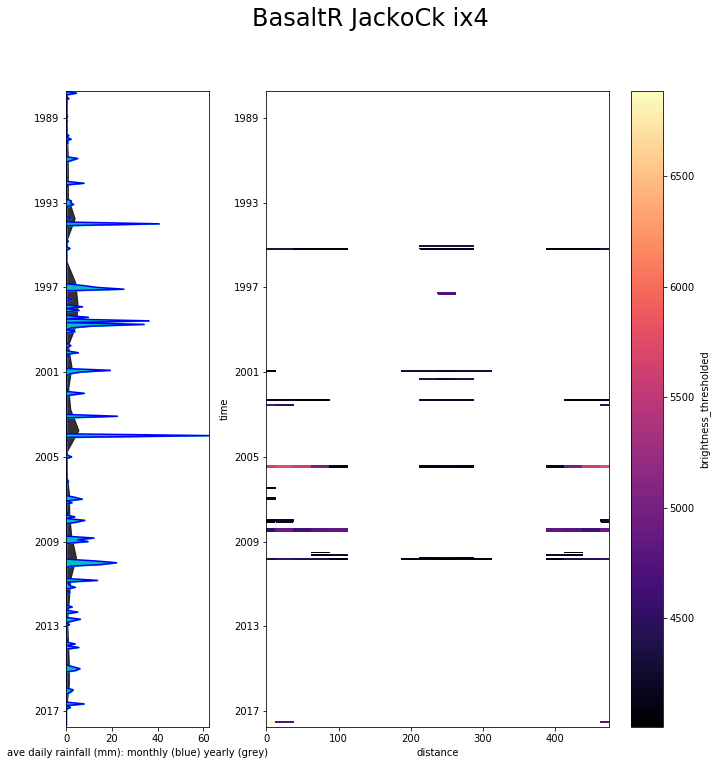

saved data to file
BasaltR_junction
BasaltR_junction_ix5
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_junction_ix5_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_junction_ix5_/hov_data_BasaltR_junction_ix5_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


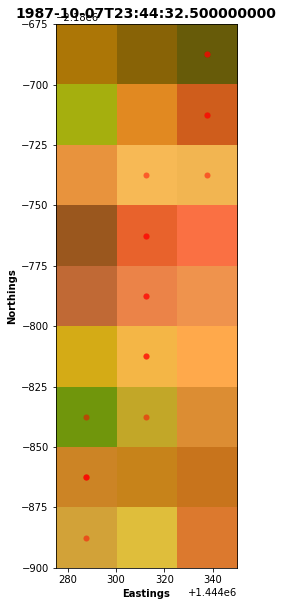

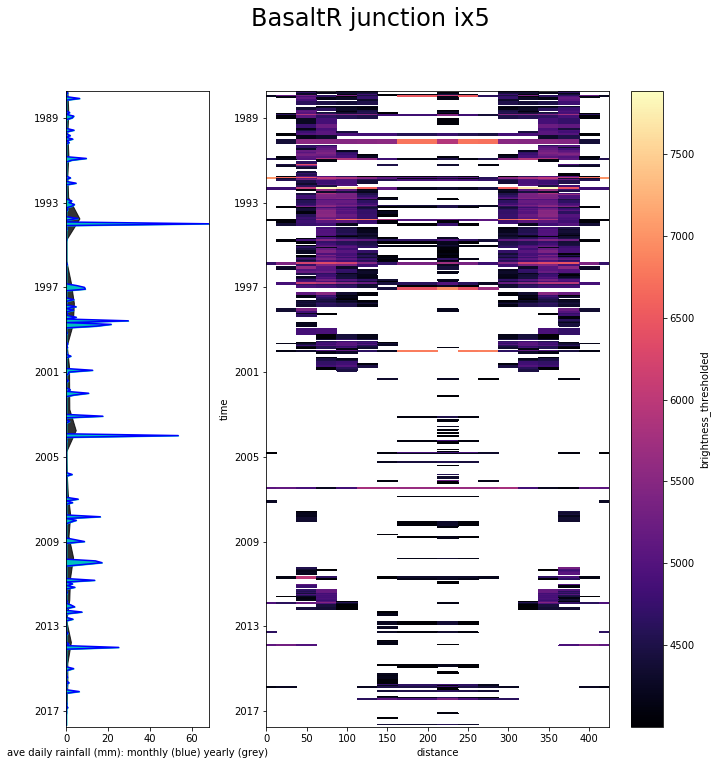

saved data to file
Bull paddock
Bull_paddock_ix6
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Bull_paddock_ix6_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Bull_paddock_ix6_/hov_data_Bull_paddock_ix6_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


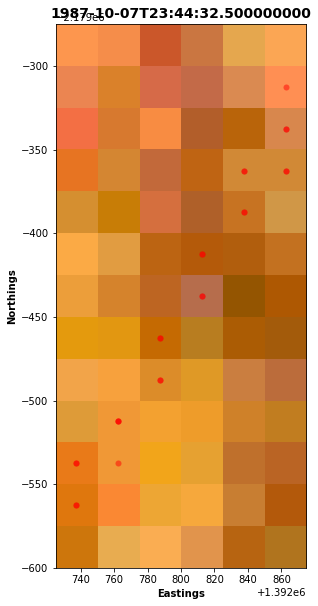

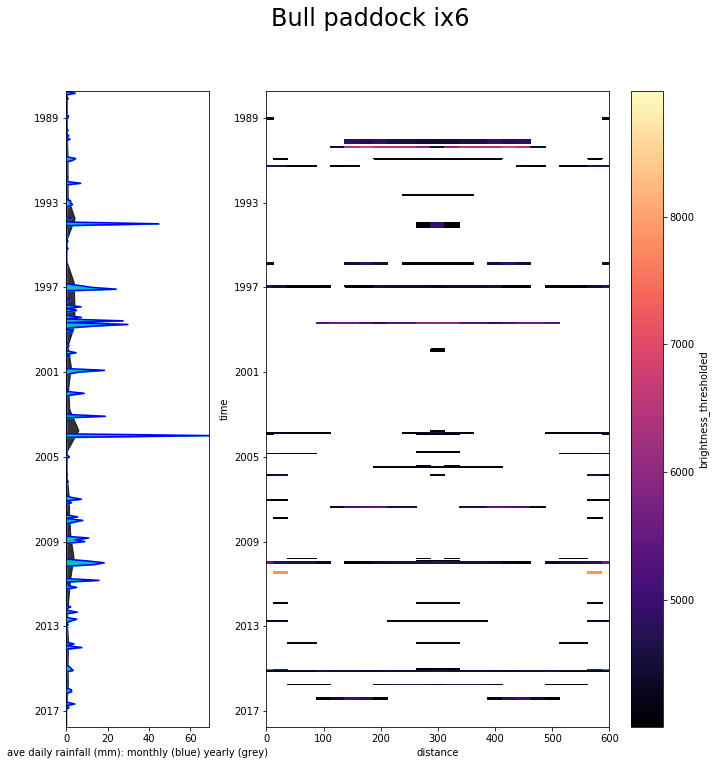

saved data to file
Cuba plains
Cuba_plains_ix7
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Cuba_plains_ix7_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Cuba_plains_ix7_/hov_data_Cuba_plains_ix7_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


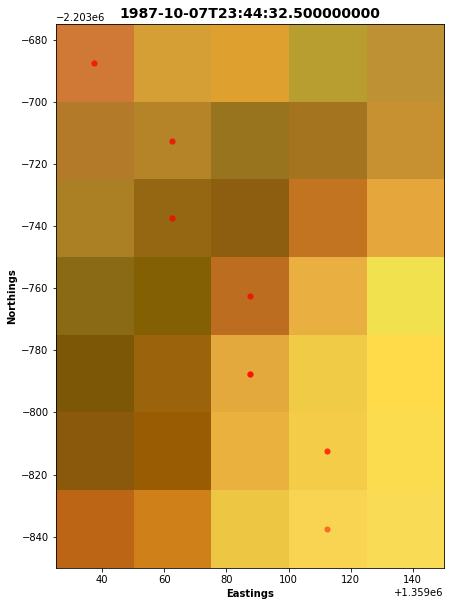

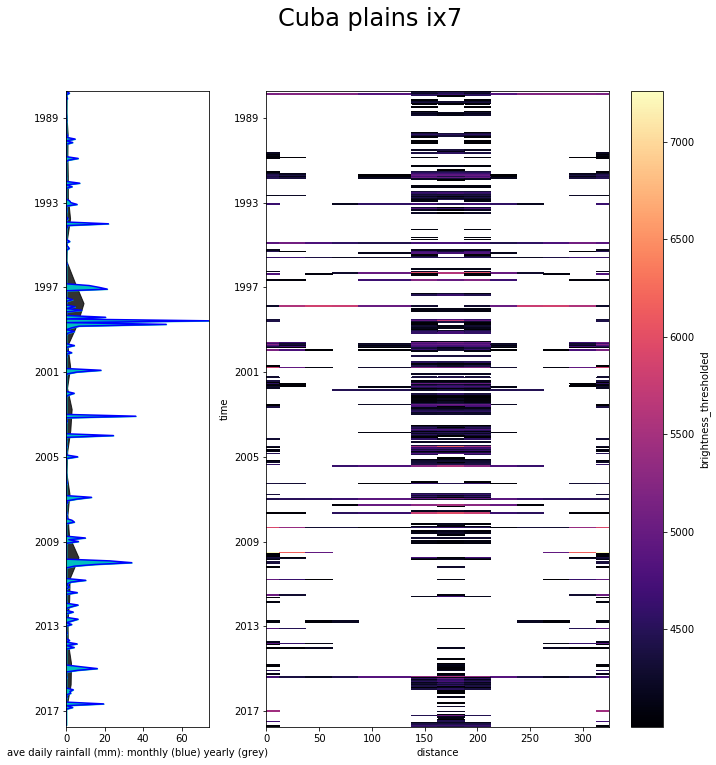

saved data to file
Expeditiion Ck
Expeditiion_Ck_ix8
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Expeditiion_Ck_ix8_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Expeditiion_Ck_ix8_/hov_data_Expeditiion_Ck_ix8_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


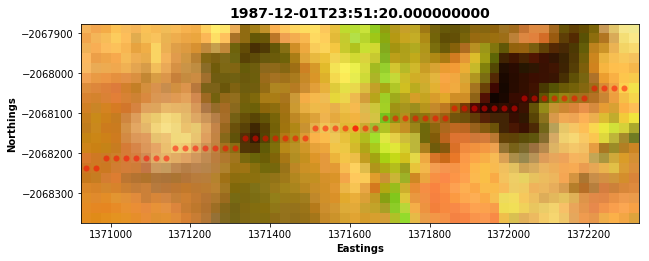

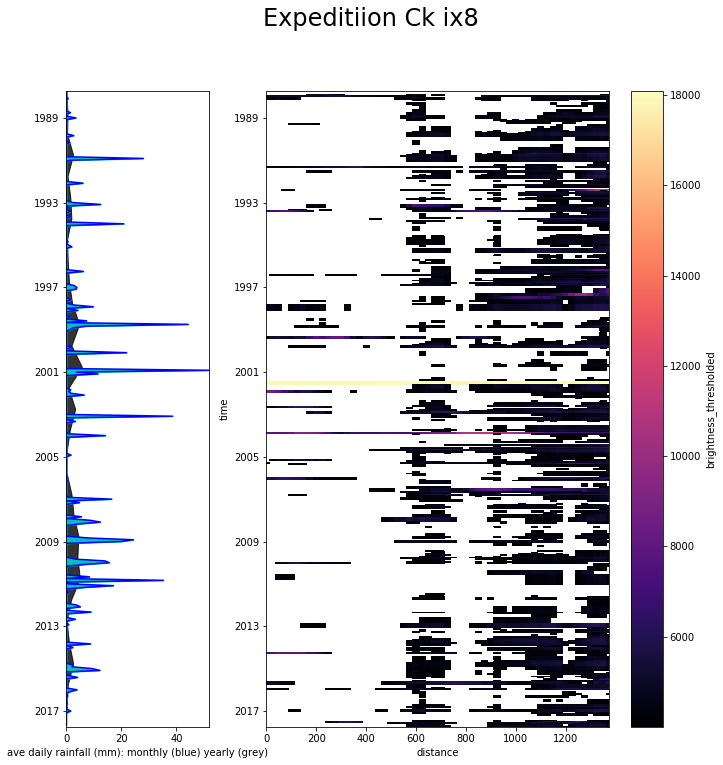

saved data to file
Felspar springs
Felspar_springs_ix9
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Felspar_springs_ix9_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Felspar_springs_ix9_/hov_data_Felspar_springs_ix9_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


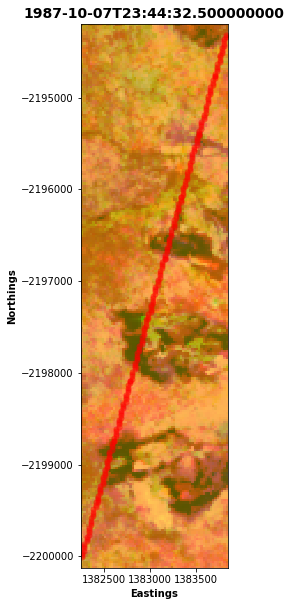

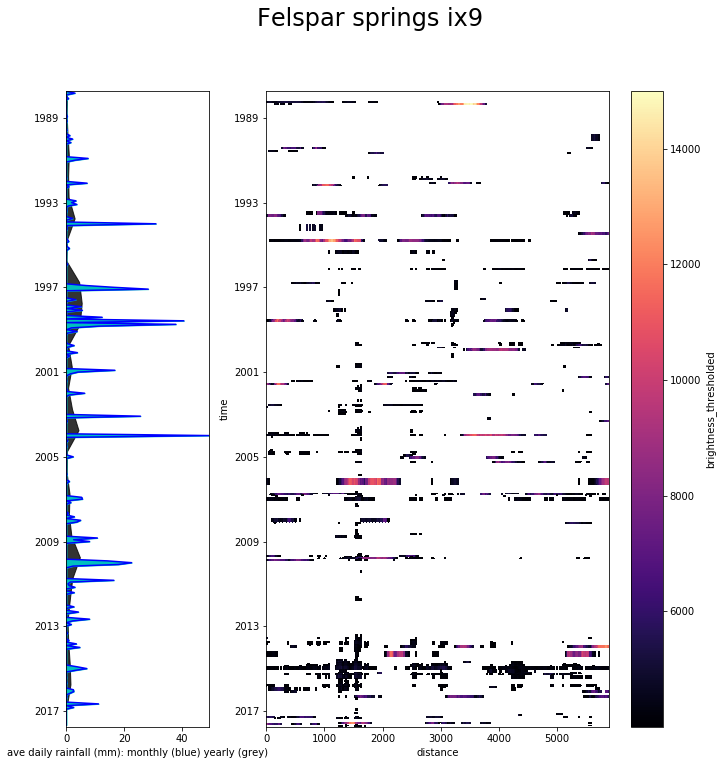

saved data to file
Fletcher Ck
Fletcher_Ck_ix10
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Fletcher_Ck_ix10_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Fletcher_Ck_ix10_/hov_data_Fletcher_Ck_ix10_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


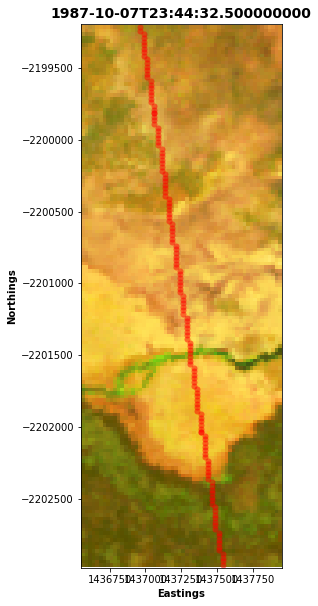

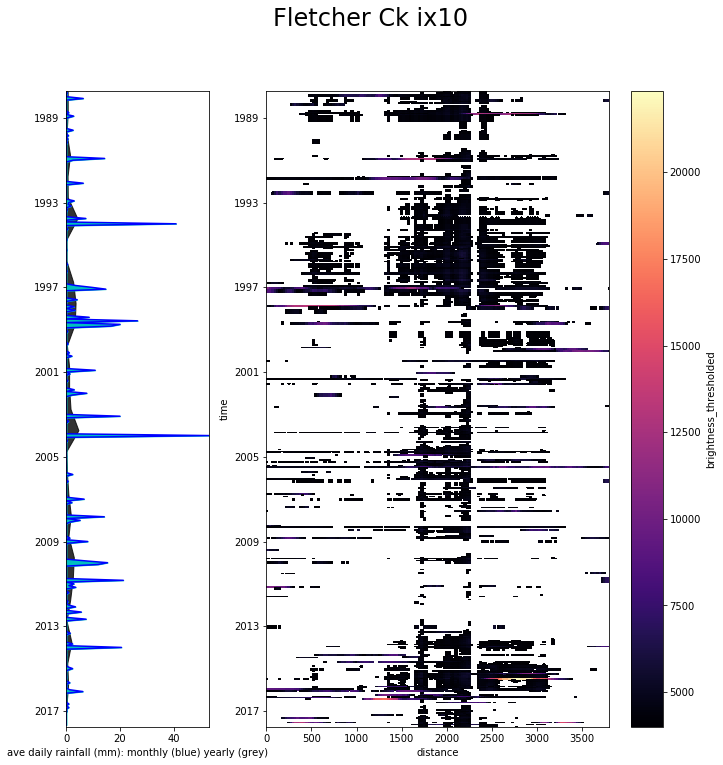

saved data to file
Fossilbrook springs
Fossilbrook_springs_ix11
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Fossilbrook_springs_ix11_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Fossilbrook_springs_ix11_/hov_data_Fossilbrook_springs_ix11_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


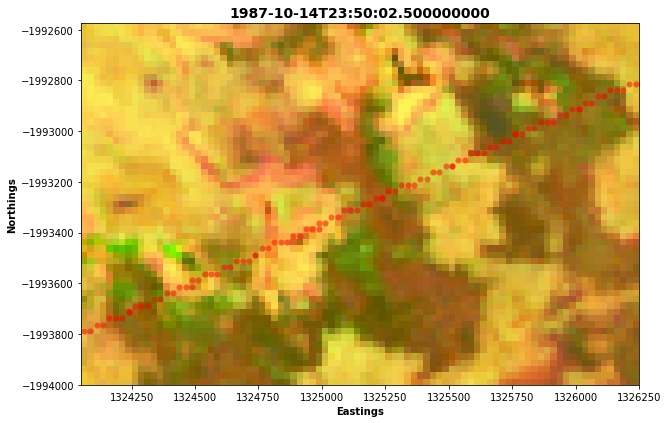

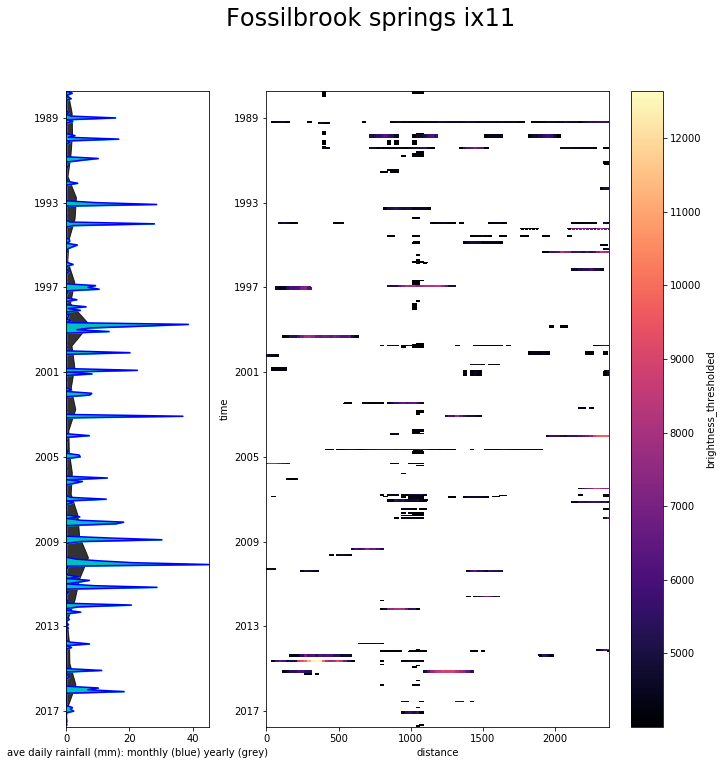

saved data to file
Glenlofty Ck downstream
Glenlofty_Ck_downstream_ix12
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glenlofty_Ck_downstream_ix12_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glenlofty_Ck_downstream_ix12_/hov_data_Glenlofty_Ck_downstream_ix12_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


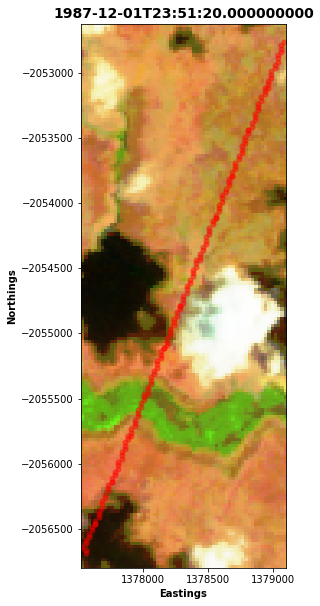

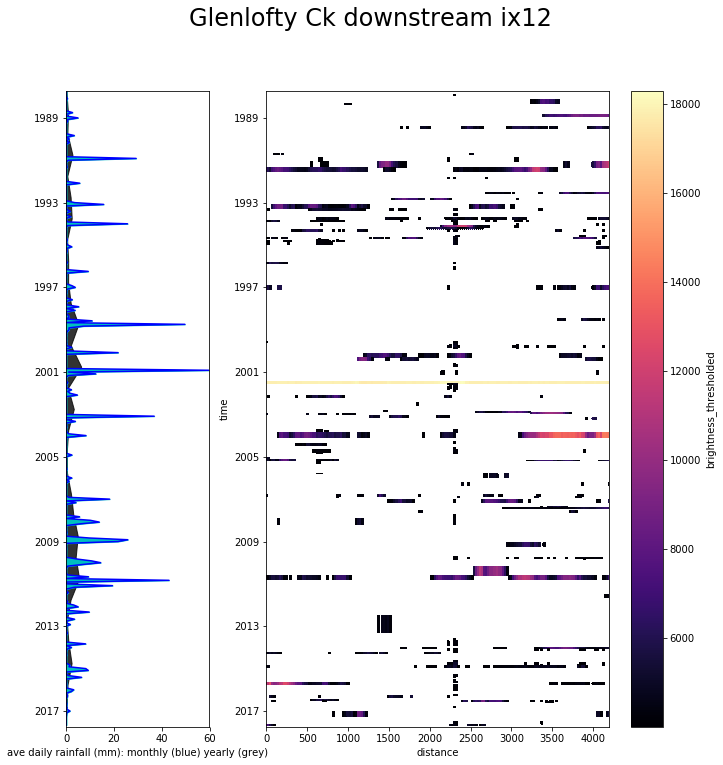

saved data to file
Glenlofty Ck Kinrara
Glenlofty_Ck_Kinrara_ix13
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glenlofty_Ck_Kinrara_ix13_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glenlofty_Ck_Kinrara_ix13_/hov_data_Glenlofty_Ck_Kinrara_ix13_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


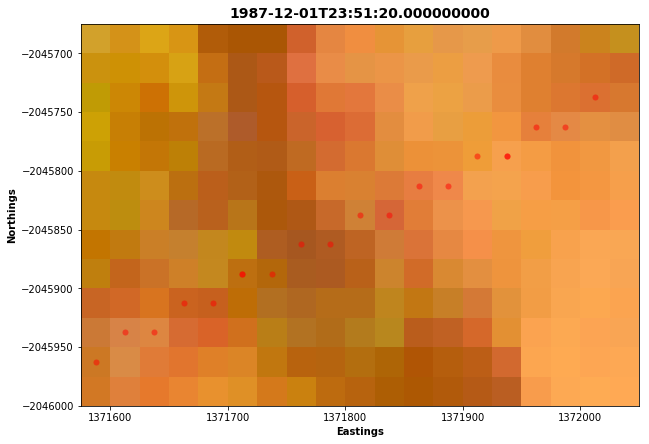

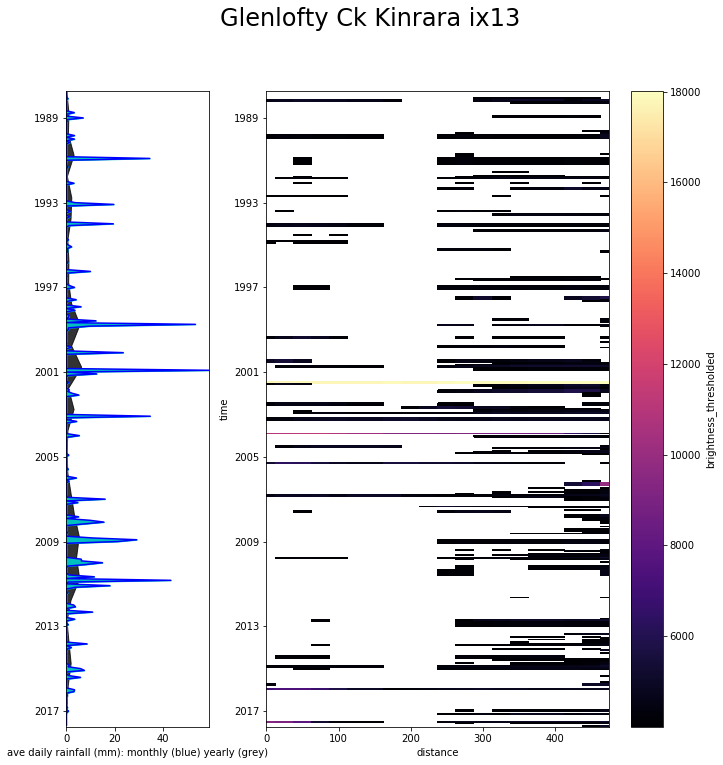

saved data to file
Jacko Creek
Jacko_Creek_ix14
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Jacko_Creek_ix14_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Jacko_Creek_ix14_/hov_data_Jacko_Creek_ix14_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


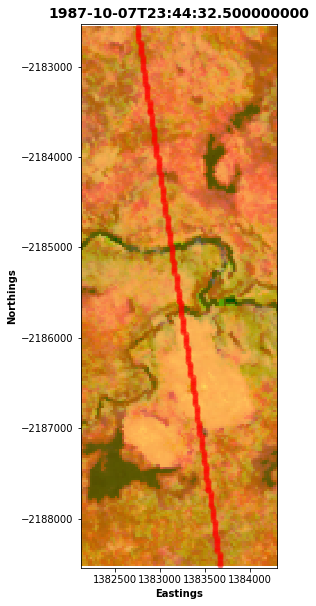

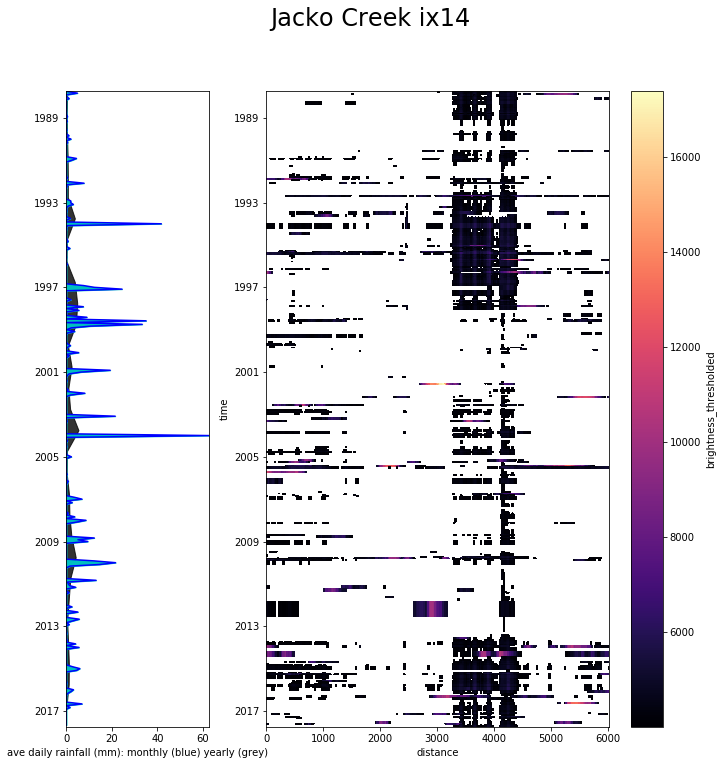

saved data to file
Lolworth
Lolworth_ix15
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Lolworth_ix15_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Lolworth_ix15_/hov_data_Lolworth_ix15_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


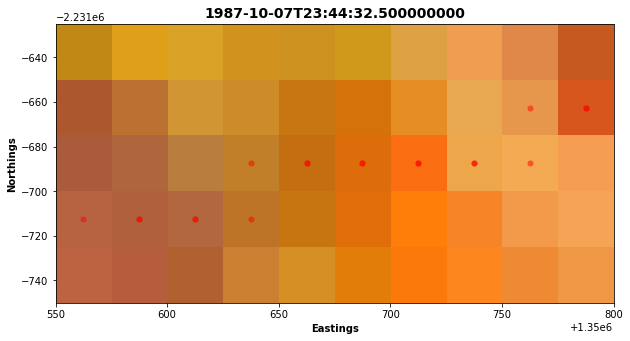

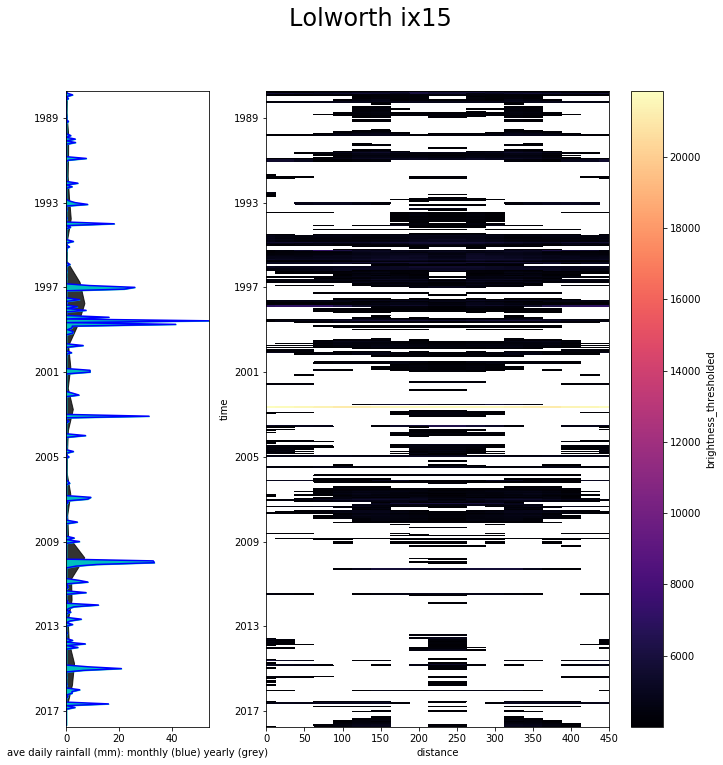

saved data to file
Near Bubbling spring
Near_Bubbling_spring_ix16
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Near_Bubbling_spring_ix16_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Near_Bubbling_spring_ix16_/hov_data_Near_Bubbling_spring_ix16_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


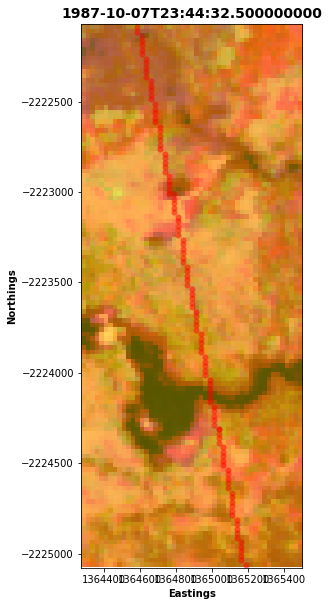

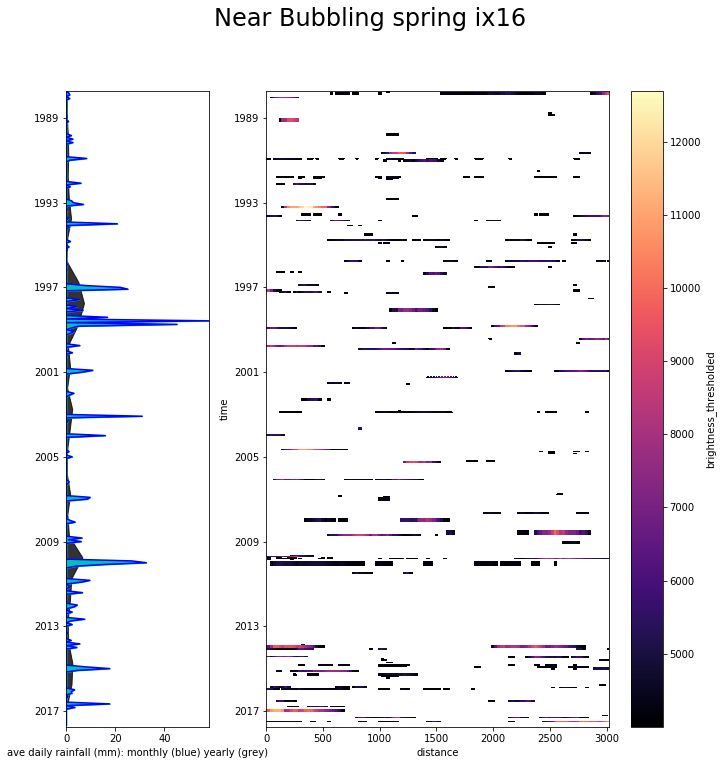

saved data to file
Pine Tree
Pine_Tree_ix17
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Pine_Tree_ix17_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Pine_Tree_ix17_/hov_data_Pine_Tree_ix17_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


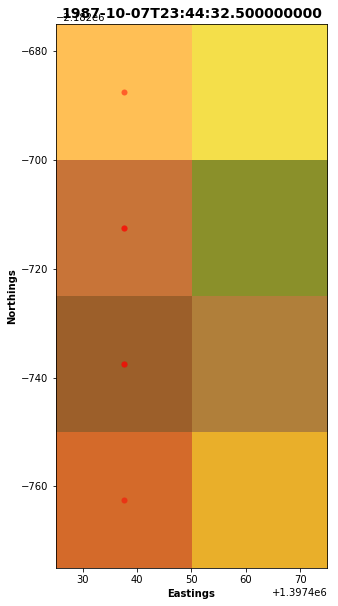

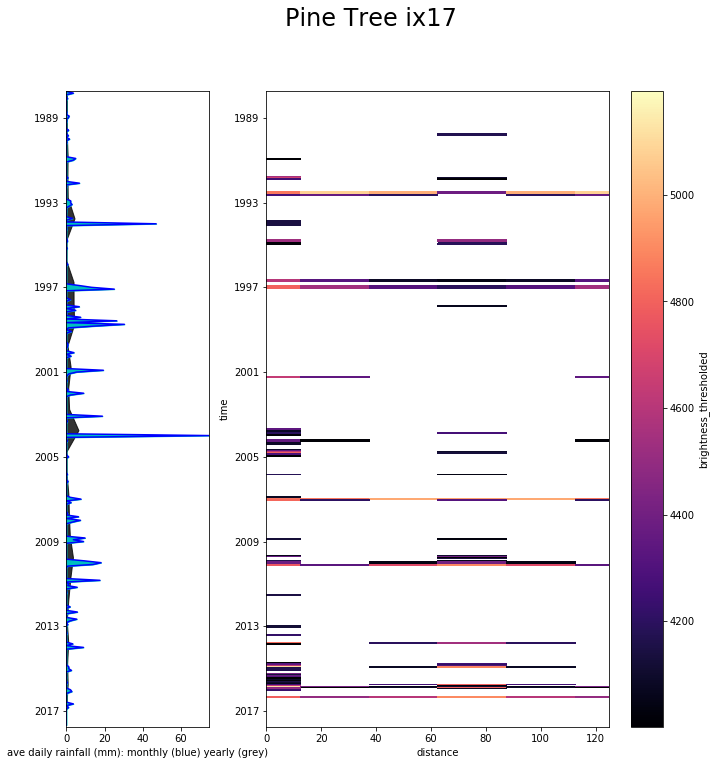

saved data to file
Plum tree
Plum_tree_ix18
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Plum_tree_ix18_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Plum_tree_ix18_/hov_data_Plum_tree_ix18_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


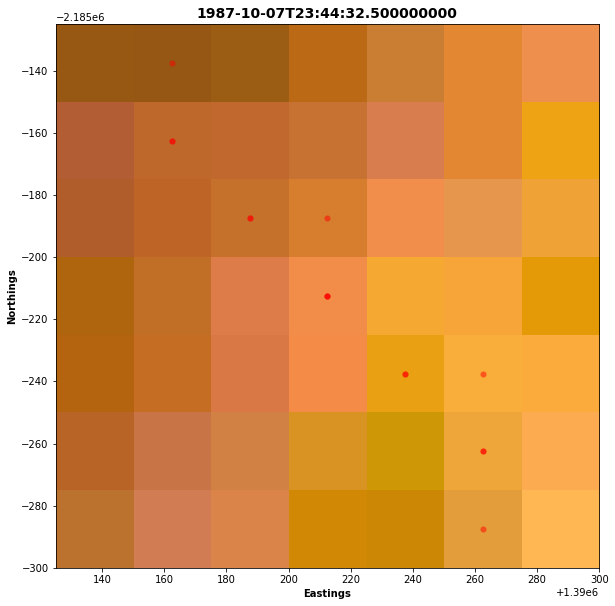

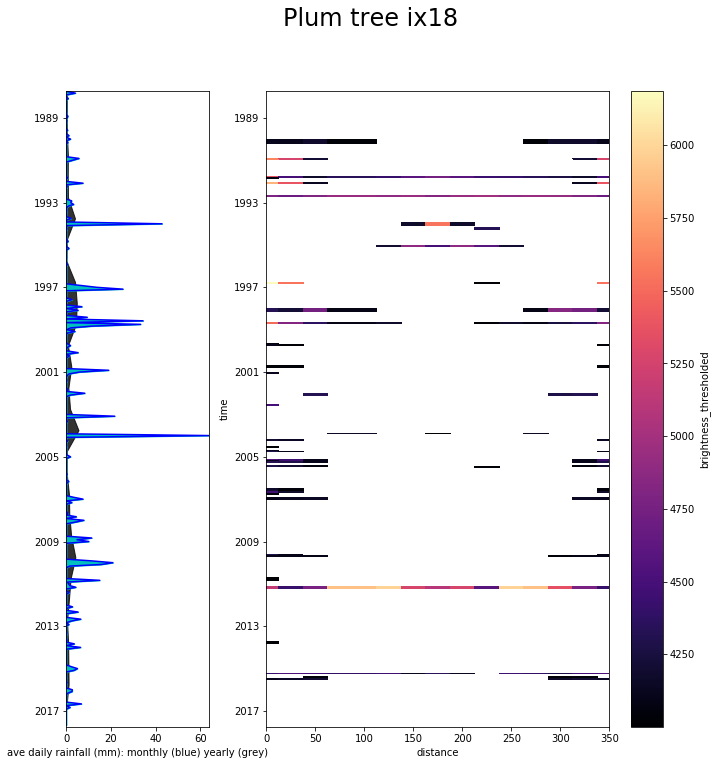

saved data to file
Spring Creek
Spring_Creek_ix19
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Spring_Creek_ix19_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Spring_Creek_ix19_/hov_data_Spring_Creek_ix19_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


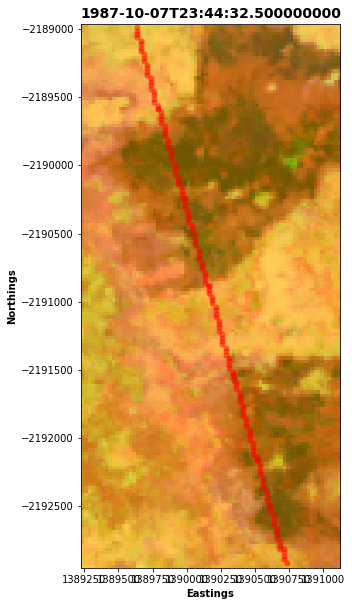

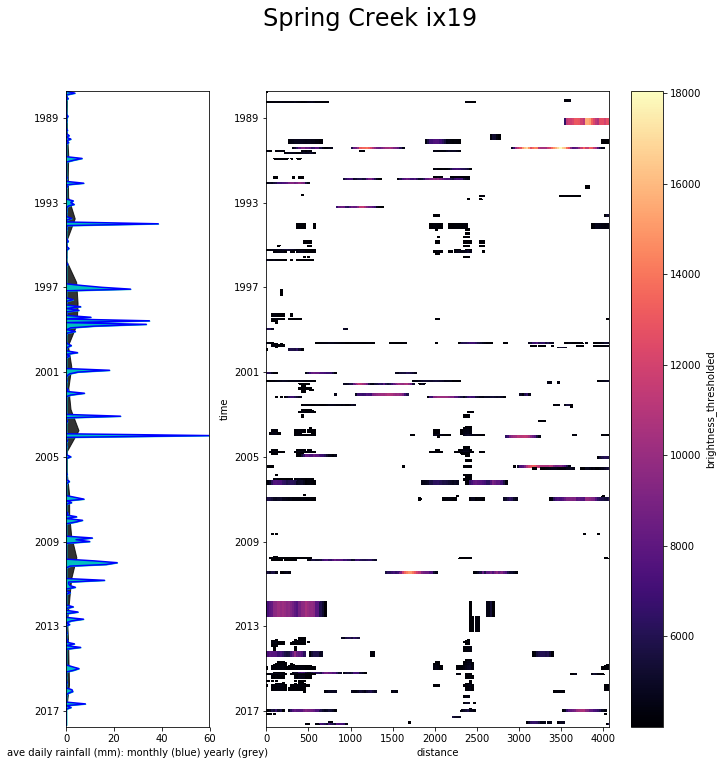

saved data to file
Spring Ck McBride
Spring_Ck_McBride_ix20
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Spring_Ck_McBride_ix20_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Spring_Ck_McBride_ix20_/hov_data_Spring_Ck_McBride_ix20_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


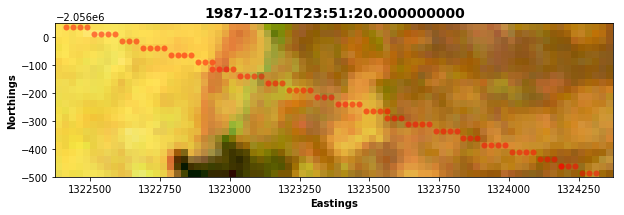

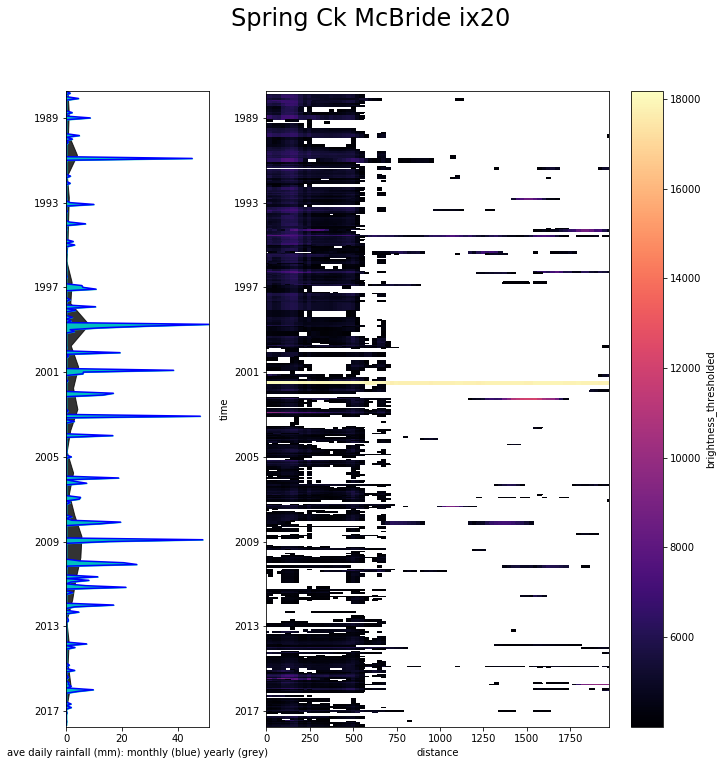

saved data to file
Talavera Creek
Talavera_Creek_ix21
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Talavera_Creek_ix21_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Talavera_Creek_ix21_/hov_data_Talavera_Creek_ix21_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


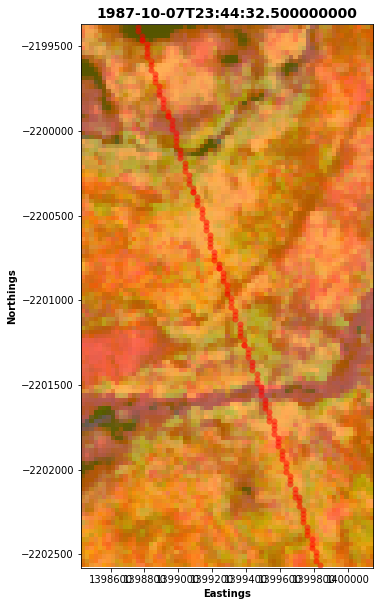

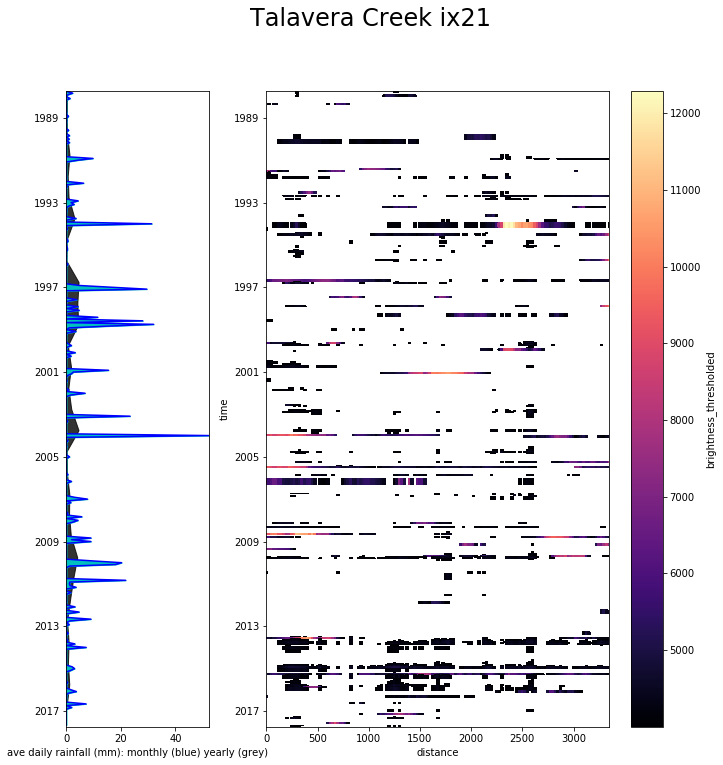

saved data to file
Talavera
Talavera_ix22
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Talavera_ix22_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Talavera_ix22_/hov_data_Talavera_ix22_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


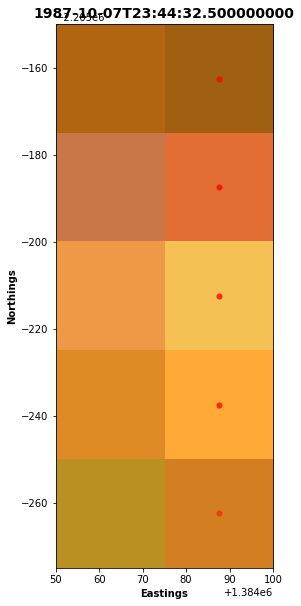

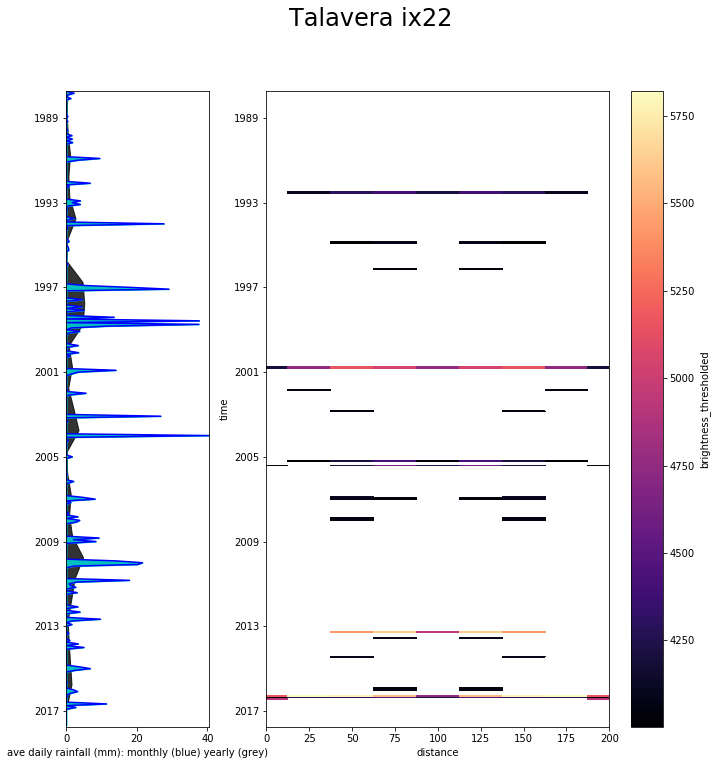

saved data to file
The Brook
The_Brook_ix23
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/The_Brook_ix23_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/The_Brook_ix23_/hov_data_The_Brook_ix23_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


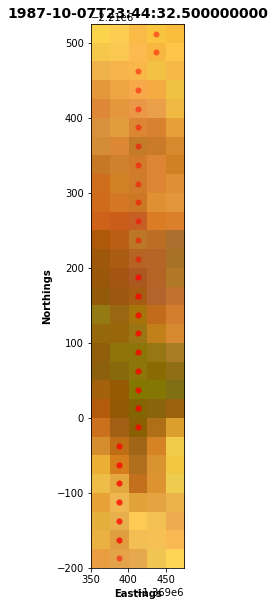

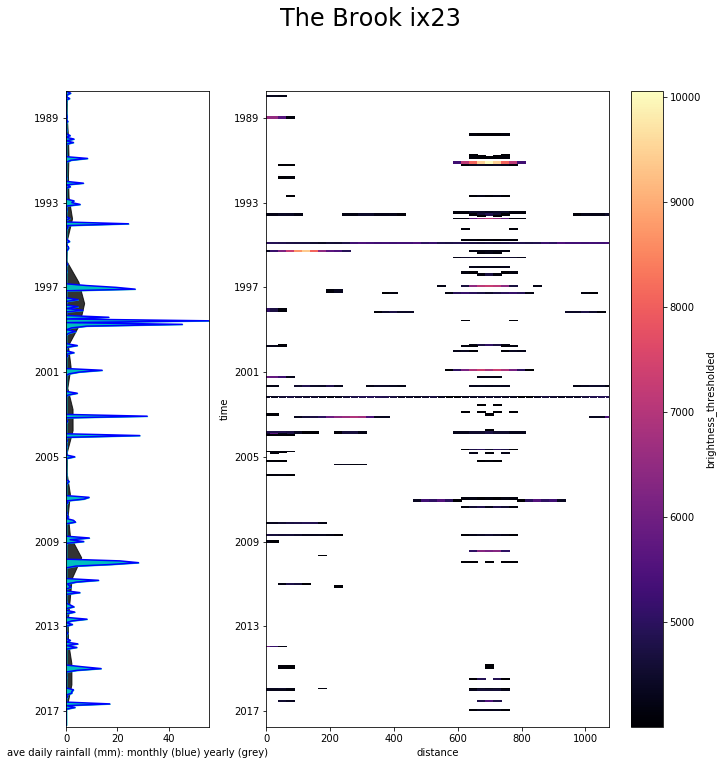

saved data to file
Toomba 2
Toomba_2_ix24
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Toomba_2_ix24_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Toomba_2_ix24_/hov_data_Toomba_2_ix24_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


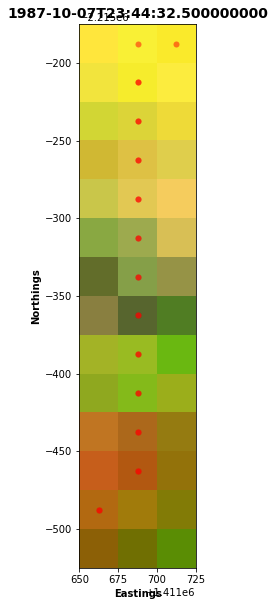

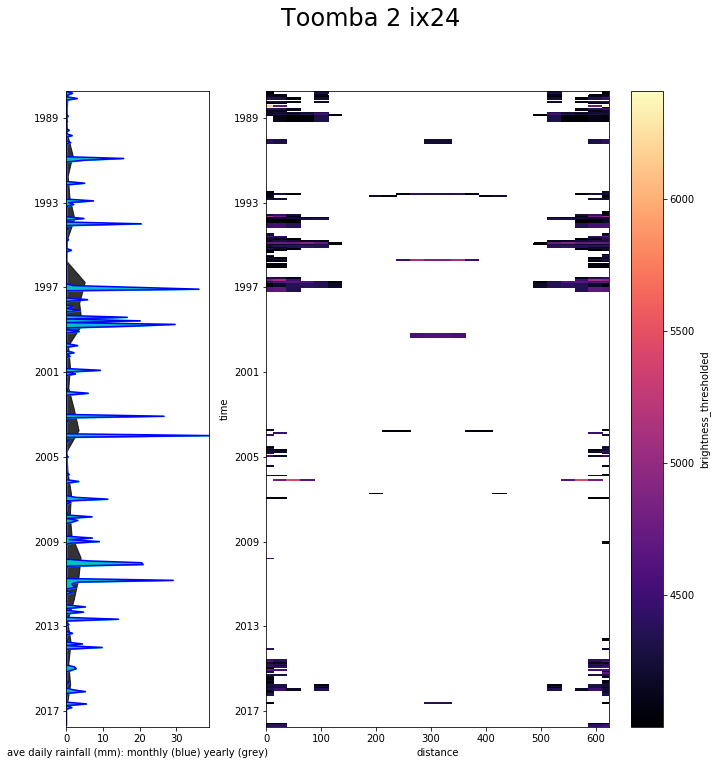

saved data to file
W Ck
W_Ck_ix25
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/W_Ck_ix25_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/W_Ck_ix25_/hov_data_W_Ck_ix25_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


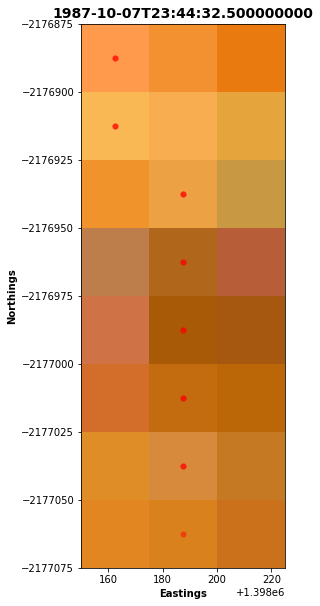

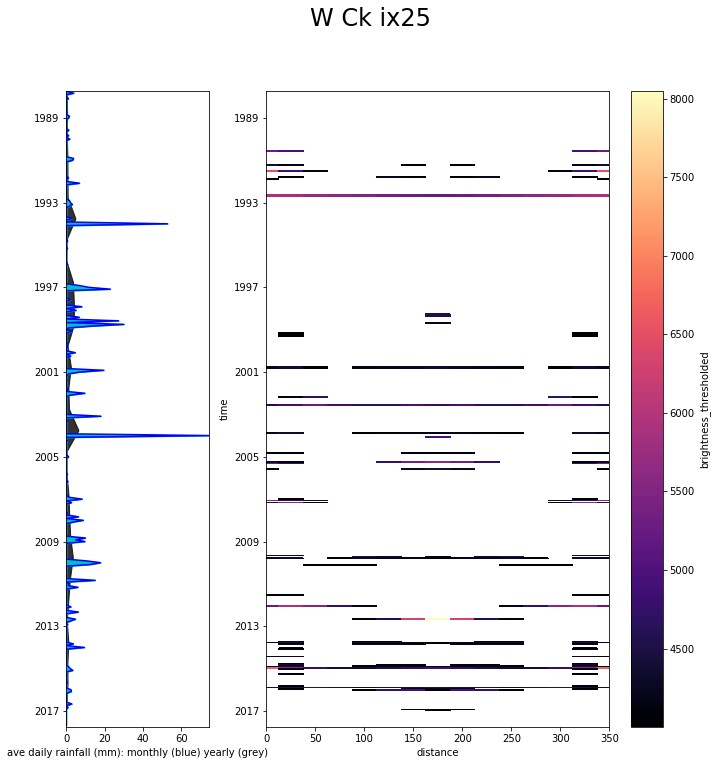

saved data to file
Glendhu
Glendhu_ix26
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glendhu_ix26_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Glendhu_ix26_/hov_data_Glendhu_ix26_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


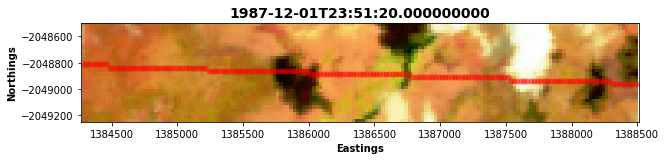

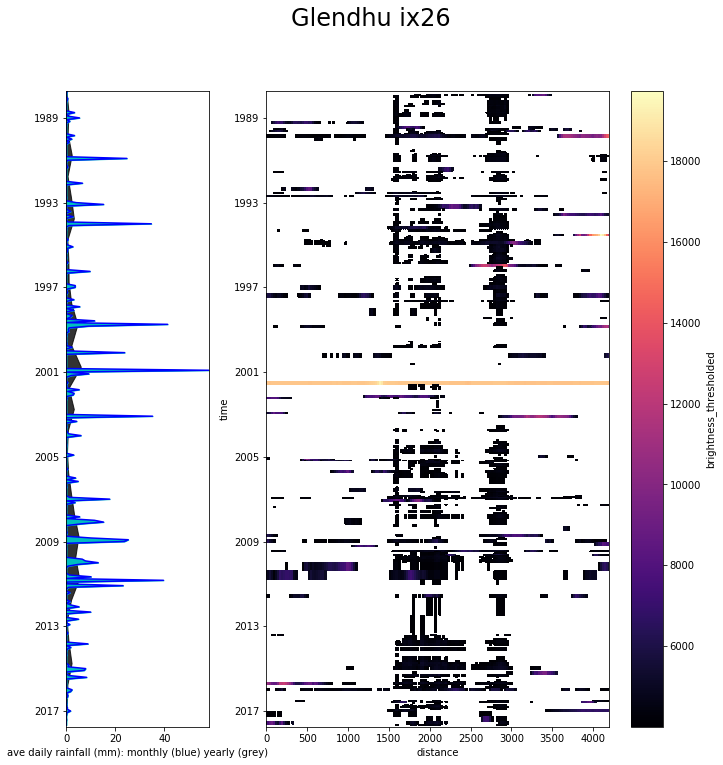

saved data to file


In [8]:
#use fiona module to open the shape file
transects = fiona.open(transects_file)

# #this statement asks you to choose a shapefile. put in a number and press enter.
# i = int(input("choose the index of the transect you would like to plot:"))
for i in range(len(transects)):

    geom1 = shape(transects[i]['geometry'])
    geom_query1 = geom_query(geom1)
    query = {
        'time': (start_of_epoch, end_of_epoch),  
    }
    query.update(geom_query(geom1, geom_crs=transects.crs_wkt)) 

### use the transect dataframe to get transect metadata

    #use the transect dataframe to get transect metadata
    transect_index = transects_df.index[i]
    transect_name = transects_df['Name'][i] 
    try:
        print(transect_name)
    except TypeError as err:
        print("TypeError: {0}".format(err))
        print(transect_name)

    #create a filename for the transect
    shape_name = transect_name.split()
    shape_name ='_'.join(shape_name)
    shape_name=shape_name+'_ix'+str(transect_index)
    print(shape_name)

    #setup a save directory for our data
    savepath ='/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/'+shape_name+'_/'
    try:
            os.mkdir(savepath)
    except OSError as err:
            print("OS error: {0}".format(err))

### Check if this notebook has already been run and the data saved:

    print(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl')

### If not, pull in rainfall and nbar 

    if os.path.isfile(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl'):
        f = open(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl', 'rb')
        hov_data = pickle.load(f) 
        f.close()
        if hov_data is not None: 
            print('loaded data from file')
            ds = hov_data['ds']
            Studysite_rain=hov_data['Studysite_rain']

    else:
        print('did not load data from previous run')
        #use our DEADataHandling function to load landsat data for all sensors in epoch and mask out cloudy scenes
        ds = DEADataHandling.load_clearlandsat(dc, query,product='nbart',masked_prop=0.80)
        print('loaded data from DEA')
        #Grab bom_rainfall_grids from the datacube
        Studysite_rain = load_rainfall(query)
        print('loaded bom rainfall grids from DEA')

### resample gridded rainfall data

    #resample xarray Dataset Studysite_rain by Annual'AS' to get yearly avg with year starting in october
    #Note that the resampling we did means that each year is labelled according to its first day  
    rain_sp = Studysite_rain.mean(dim = ('latitude','longitude'))
    month_sp = rain_sp.resample('MS', dim = 'time', how = 'mean')
    year_avg = Studysite_rain.resample('AS-OCT', dim='time', how='mean', keep_attrs=True)
    # Create a spatial average
    year_avg_sp = year_avg.mean(dim = ('latitude', 'longitude'))

    #Calculate tasselled cap and thresholded tasseled cap

    tci = tasseled_cap(ds)

    thresholded_tci = TasseledCapTools.thresholded_tasseled_cap(ds)

    ## Compress #check source and destination crs
    crs = ds.crs
    crs_wkt = ds.crs.wkt
    geom_w = warp_geometry(geom1, query['crs'], crs_wkt)
    hov_ds= transect(ds, geom_w, 25)

    hov_tci = transect(tci, geom_w,25)
    hov_thresh_tci =transect(thresholded_tci, geom_w, 25)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        #try plotting the first clean time slice to see where we are
        print('transect image: ')
        DEAPlotting.three_band_image(ds, bands=['swir1','nir','green'],time =0, contrast_enhance=True)
        plt.scatter(x=hov_ds.coords['x'], y=hov_ds.coords['y'], c='r',
                   linewidths='0.01', alpha = 0.5)
        plt.savefig('{}{}_HovImg_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
        plt.show()

    #Make a hovmoller plot and save it to file.
    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_thresh_tci.brightness_thresholded.plot(x='distance', y='time', yincrease = False, cmap = 'magma')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_thresh_tci.brightness_thresholded.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle(shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCIBright_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()

### Save the data to an output file for future use

    try:
        #make a dictionary of the data we want to save
        hov_data = {'ds':ds, 'Studysite_rain':Studysite_rain,'rain_sp':rain_sp,'month_sp':month_sp,
                    'year_avg':year_avg,'year_avg_sp':year_avg_sp,'hov_tci':hov_tci, 'start_of_epoch': start_of_epoch, 
                    'end_of_epoch':end_of_epoch}

        f = open(savepath+'hov_data_tci_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl', 'wb')
        pickle.dump(hov_data,f) 
        print('saved data to file')
        #pickle.dump(pickle_vars,f,protocol = 2, fix_imports = True) #maintain compatibility with python 2
        f.close()
    except:
        print('did not save to file')